# Импорт библиотек

In [109]:
# Importing libs
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AffinityPropagation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import plotly as py
import plotly.graph_objs as go
import os
py.offline.init_notebook_mode(connected = True)
#print(os.listdir("../input"))
import datetime as dt
import missingno as msno
plt.rcParams['figure.dpi'] = 140
import re

In [105]:
df = pd.read_csv('DataEngineer.csv')

df.head(10)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,Data Engineer,$80K-$150K (Glassdoor est.),Company Description\nSagence is a management a...,4.5,Sagence\n4.5,"New York, NY","Chicago, IL",1 to 50 employees,2009,Company - Private,Consulting,Business Services,$10 to $25 million (USD),"WCI Consulting, PwC",-1
1,Senior Data Engineer (Healthcare Domain experi...,$80K-$150K (Glassdoor est.),"Key Responsibilities\n\n- Architect, build, an...",3.4,Enterprise Integration\n3.4,"New York, NY","Jacksonville, FL",51 to 200 employees,1998,Company - Private,IT Services,Information Technology,$25 to $50 million (USD),-1,-1
2,Data Engineers,$80K-$150K (Glassdoor est.),Overview\n\nJob description\n\nPosition Overvi...,5.0,Maestro Technologies\n5.0,"New York, NY","Trenton, NJ",51 to 200 employees,2003,Company - Private,IT Services,Information Technology,$5 to $10 million (USD),-1,-1
3,Client Trade Support Engineer,$80K-$150K (Glassdoor est.),About the Position\n\n\nThis position will sup...,4.8,Jane Street\n4.8,"New York, NY","New York, NY",501 to 1000 employees,2000,Company - Private,Investment Banking & Asset Management,Finance,Unknown / Non-Applicable,-1,-1
4,Data Engineer,$80K-$150K (Glassdoor est.),Data Engineer\n\nJob Details\nLevel\nExperienc...,3.7,GNY Insurance Companies\n3.7,"New York, NY","New York, NY",201 to 500 employees,1914,Company - Private,Insurance Carriers,Insurance,$100 to $500 million (USD),"Travelers, Chubb, Crum & Forster",True
5,Operations Engineer,$80K-$150K (Glassdoor est.),"Hi, we're Oscar. We're hiring an Operations En...",3.7,Oscar Health\n3.7,"New York, NY","New York, NY",1001 to 5000 employees,2012,Company - Private,Insurance Agencies & Brokerages,Insurance,$2 to $5 billion (USD),-1,True
6,Senior Data Engineer,$80K-$150K (Glassdoor est.),Senior Data Engineer\n\nMaster’s degree in Inf...,3.0,Affinity Solutions\n3.0,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",True
7,Data Engineer,$80K-$150K (Glassdoor est.),Our client is a leading hedge fund looking to ...,4.2,NJF Global Holdings\n4.2,"New York, NY","London, United Kingdom",51 to 200 employees,2003,Company - Private,Staffing & Outsourcing,Business Services,$10 to $25 million (USD),-1,True
8,Data Research Developer,$80K-$150K (Glassdoor est.),About Us\n\nTeza is a quantitative asset manag...,4.3,Teza Technologies\n4.3,"New York, NY","Chicago, IL",51 to 200 employees,2009,Company - Private,Financial Analytics & Research,Finance,Unknown / Non-Applicable,-1,-1
9,Data Engineer (Python),$80K-$150K (Glassdoor est.),What we're looking for\n\nWe are looking for a...,4.4,Conductor\n4.4,"New York, NY","New York, NY",201 to 500 employees,2010,Company - Private,Internet,Information Technology,$25 to $50 million (USD),"Brightedge Technologies, Moz, seoClarity",True


In [9]:
# Missing data

for i in df.columns:
    null_rate = df[i].isna().sum() / len(df) * 100 
    if null_rate > 0 :
        print("{} null rate: {}%".format(i,round(null_rate,2)))

Пустых значений нет

# Работа с данными
  - из названий компаний надо убрать рейтинг

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2528 entries, 0 to 2527
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          2528 non-null   object 
 1   Salary Estimate    2528 non-null   object 
 2   Job Description    2528 non-null   object 
 3   Rating             2528 non-null   float64
 4   Company Name       2528 non-null   object 
 5   Location           2528 non-null   object 
 6   Headquarters       2528 non-null   object 
 7   Size               2528 non-null   object 
 8   Founded            2528 non-null   int64  
 9   Type of ownership  2528 non-null   object 
 10  Industry           2528 non-null   object 
 11  Sector             2528 non-null   object 
 12  Revenue            2528 non-null   object 
 13  Competitors        2528 non-null   object 
 14  Easy Apply         2528 non-null   object 
dtypes: float64(1), int64(1), object(13)
memory usage: 296.4+ KB


In [116]:
re.sub('[ ]{1,}',' ',re.sub('[^0-9]',' ',df['Salary Estimate'][0])).strip().split(' ')

round(coef*np.mean(
        [int(c) for c in t if len(re.sub('[^0-9]','',c))>0]),-3)

['80', '150']

In [118]:
df['Avg. Salary']=0
for i in range(len(df['Company Name'])):
  df['Company Name'][i]=str(df['Company Name'][i]).split('\n')[0]
  t=re.sub('[ ]{1,}',' ',re.sub('[^0-9]',' ',df['Salary Estimate'][i])).strip().split(' ')
  df['Avg. Salary'][i]=round(np.mean([int(c) for c in t]),0)

df.head(3)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,Avg. Salary
0,Data Engineer,$80K-$150K (Glassdoor est.),Company Description\nSagence is a management a...,4.5,Sagence,"New York, NY","Chicago, IL",1 to 50 employees,2009,Company - Private,Consulting,Business Services,$10 to $25 million (USD),"WCI Consulting, PwC",-1,115
1,Senior Data Engineer (Healthcare Domain experi...,$80K-$150K (Glassdoor est.),"Key Responsibilities\n\n- Architect, build, an...",3.4,Enterprise Integration,"New York, NY","Jacksonville, FL",51 to 200 employees,1998,Company - Private,IT Services,Information Technology,$25 to $50 million (USD),-1,-1,115
2,Data Engineers,$80K-$150K (Glassdoor est.),Overview\n\nJob description\n\nPosition Overvi...,5.0,Maestro Technologies,"New York, NY","Trenton, NJ",51 to 200 employees,2003,Company - Private,IT Services,Information Technology,$5 to $10 million (USD),-1,-1,115


# Будем использовать фирменные цвета HH

* В графиках использовать основные цвета сайта hh.ru


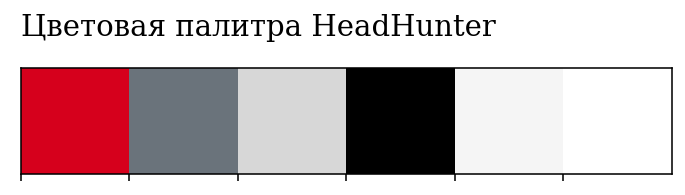

In [39]:
# Palette
sns.palplot(['#d6001c', '#6a737b','#d7d7d7', '#000000', '#f5f5f5','#ffffff'])

plt.title("Цветовая палитра HeadHunter",loc='left',fontfamily='serif',fontsize=15,y=1.2)
plt.show()

# Графики

## Построить график компаний с самым большим кол-вом вакансий

In [40]:
data=df.groupby(['Company Name'])['Job Title'].count().sort_values(ascending=False)[:10]
data.head(10)

Company Name
Amazon                        28
Lockheed Martin               18
Apple                         18
IntraEdge                     16
Humana                        16
Diverse Lynx                  15
Bell Helicopter               15
Management Decisions, Inc.    14
Google                        14
MUFG                          13
Name: Job Title, dtype: int64

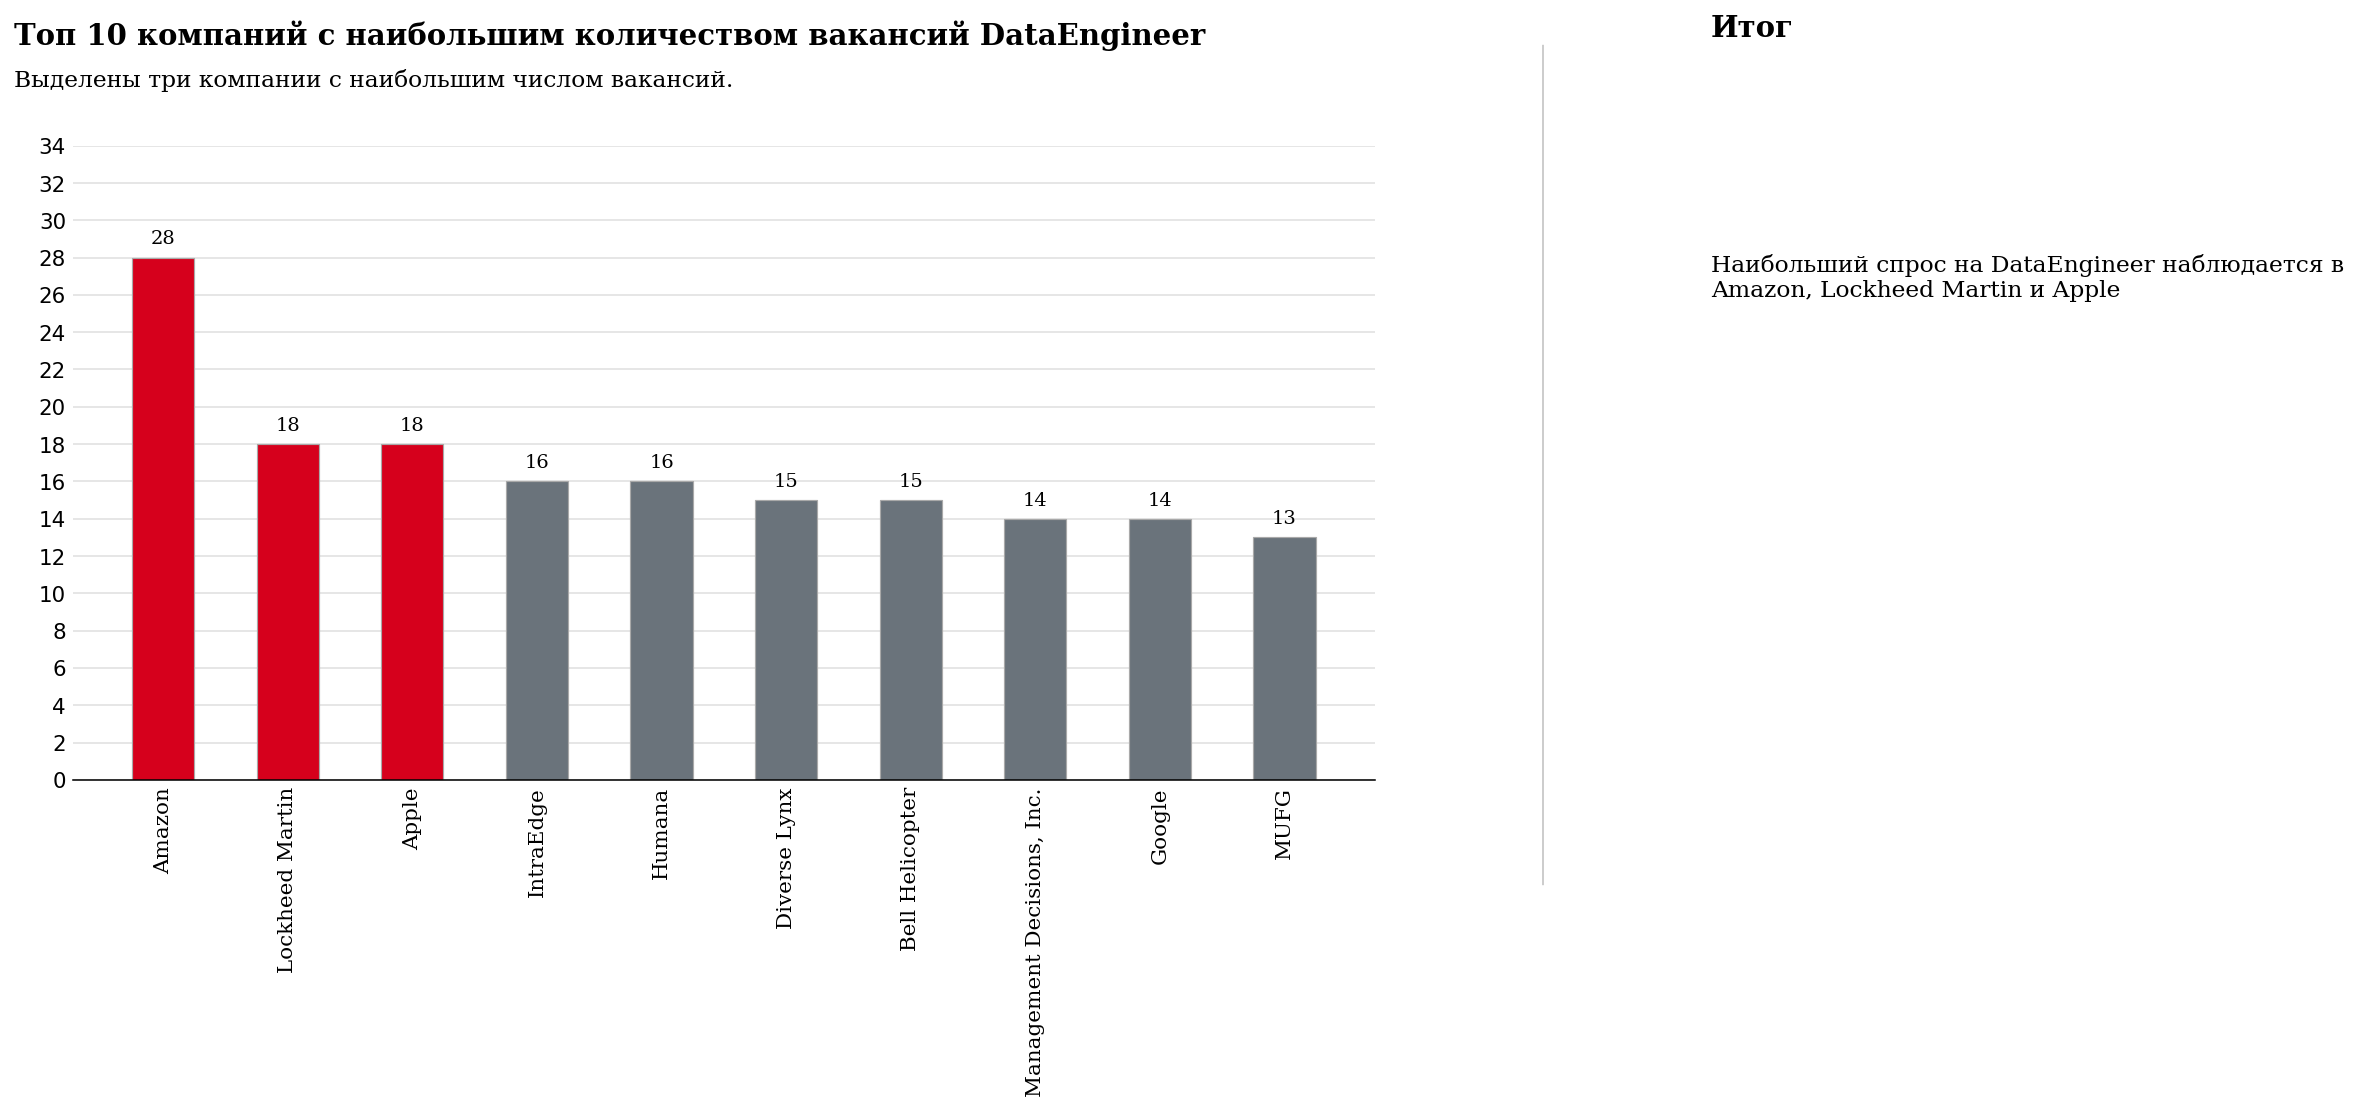

In [48]:
# Plot

color_map = ['#6a737b' for _ in range(10)]
color_map[0] = color_map[1] = color_map[2] =  '#d6001c' # color highlight

fig, ax = plt.subplots(1,1, figsize=(12, 6))
ax.bar(data.index, data, width=0.5, 
       edgecolor='darkgray',
       linewidth=0.6,color=color_map)

#annotations
for i in data.index:
    ax.annotate(f"{data[i]}", 
                   xy=(i, data[i] + 1), #i like to change this to roughly 5% of the highest cat
                   va = 'center', ha='center',fontweight='light', fontfamily='serif')



# Remove border from plot

for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
# Tick labels

ax.set_xticklabels(data.index, fontfamily='serif', rotation=90)

# Title and sub-title

fig.text(0.09, 1, 'Топ 10 компаний с наибольшим количеством вакансий DataEngineer', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.09, 0.95, 'Выделены три компании с наибольшим числом вакансий.', fontsize=12, fontweight='light', fontfamily='serif')

fig.text(1.1, 1.01, 'Итог', fontsize=15, fontweight='bold', fontfamily='serif')


fig.text(1.1, 0.67, '''
Наибольший спрос на DataEngineer наблюдается в
Amazon, Lockheed Martin и Apple
'''
         , fontsize=12, fontweight='light', fontfamily='serif')

ax.grid(axis='y', linestyle='-', alpha=0.4)   

grid_y_ticks = np.arange(0, 35, 2) # y ticks, min, max, then step
ax.set_yticks(grid_y_ticks)
ax.set_axisbelow(True)

#Axis labels

#plt.xlabel("Country", fontsize=12, fontweight='light', fontfamily='serif',loc='left',y=-1.5)
#plt.ylabel("Count", fontsize=12, fontweight='light', fontfamily='serif')
#plt.legend(loc='upper right')
    
# thicken the bottom line if you want to
#plt.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

ax.tick_params(axis='both', which='major', labelsize=11)


import matplotlib.lines as lines
l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])

ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

## Построить график самых популярный названий в вакансиях

In [49]:
data=df.groupby(['Job Title'])['Job Title'].count().sort_values(ascending=False)[:10]
data.head(10)

Job Title
Data Engineer                469
Senior Data Engineer         103
Software Engineer             93
Big Data Engineer             73
Sr. Data Engineer             35
Machine Learning Engineer     17
Data Engineer II              16
Data Warehouse Engineer       14
Systems Engineer              13
Data Platform Engineer        13
Name: Job Title, dtype: int64

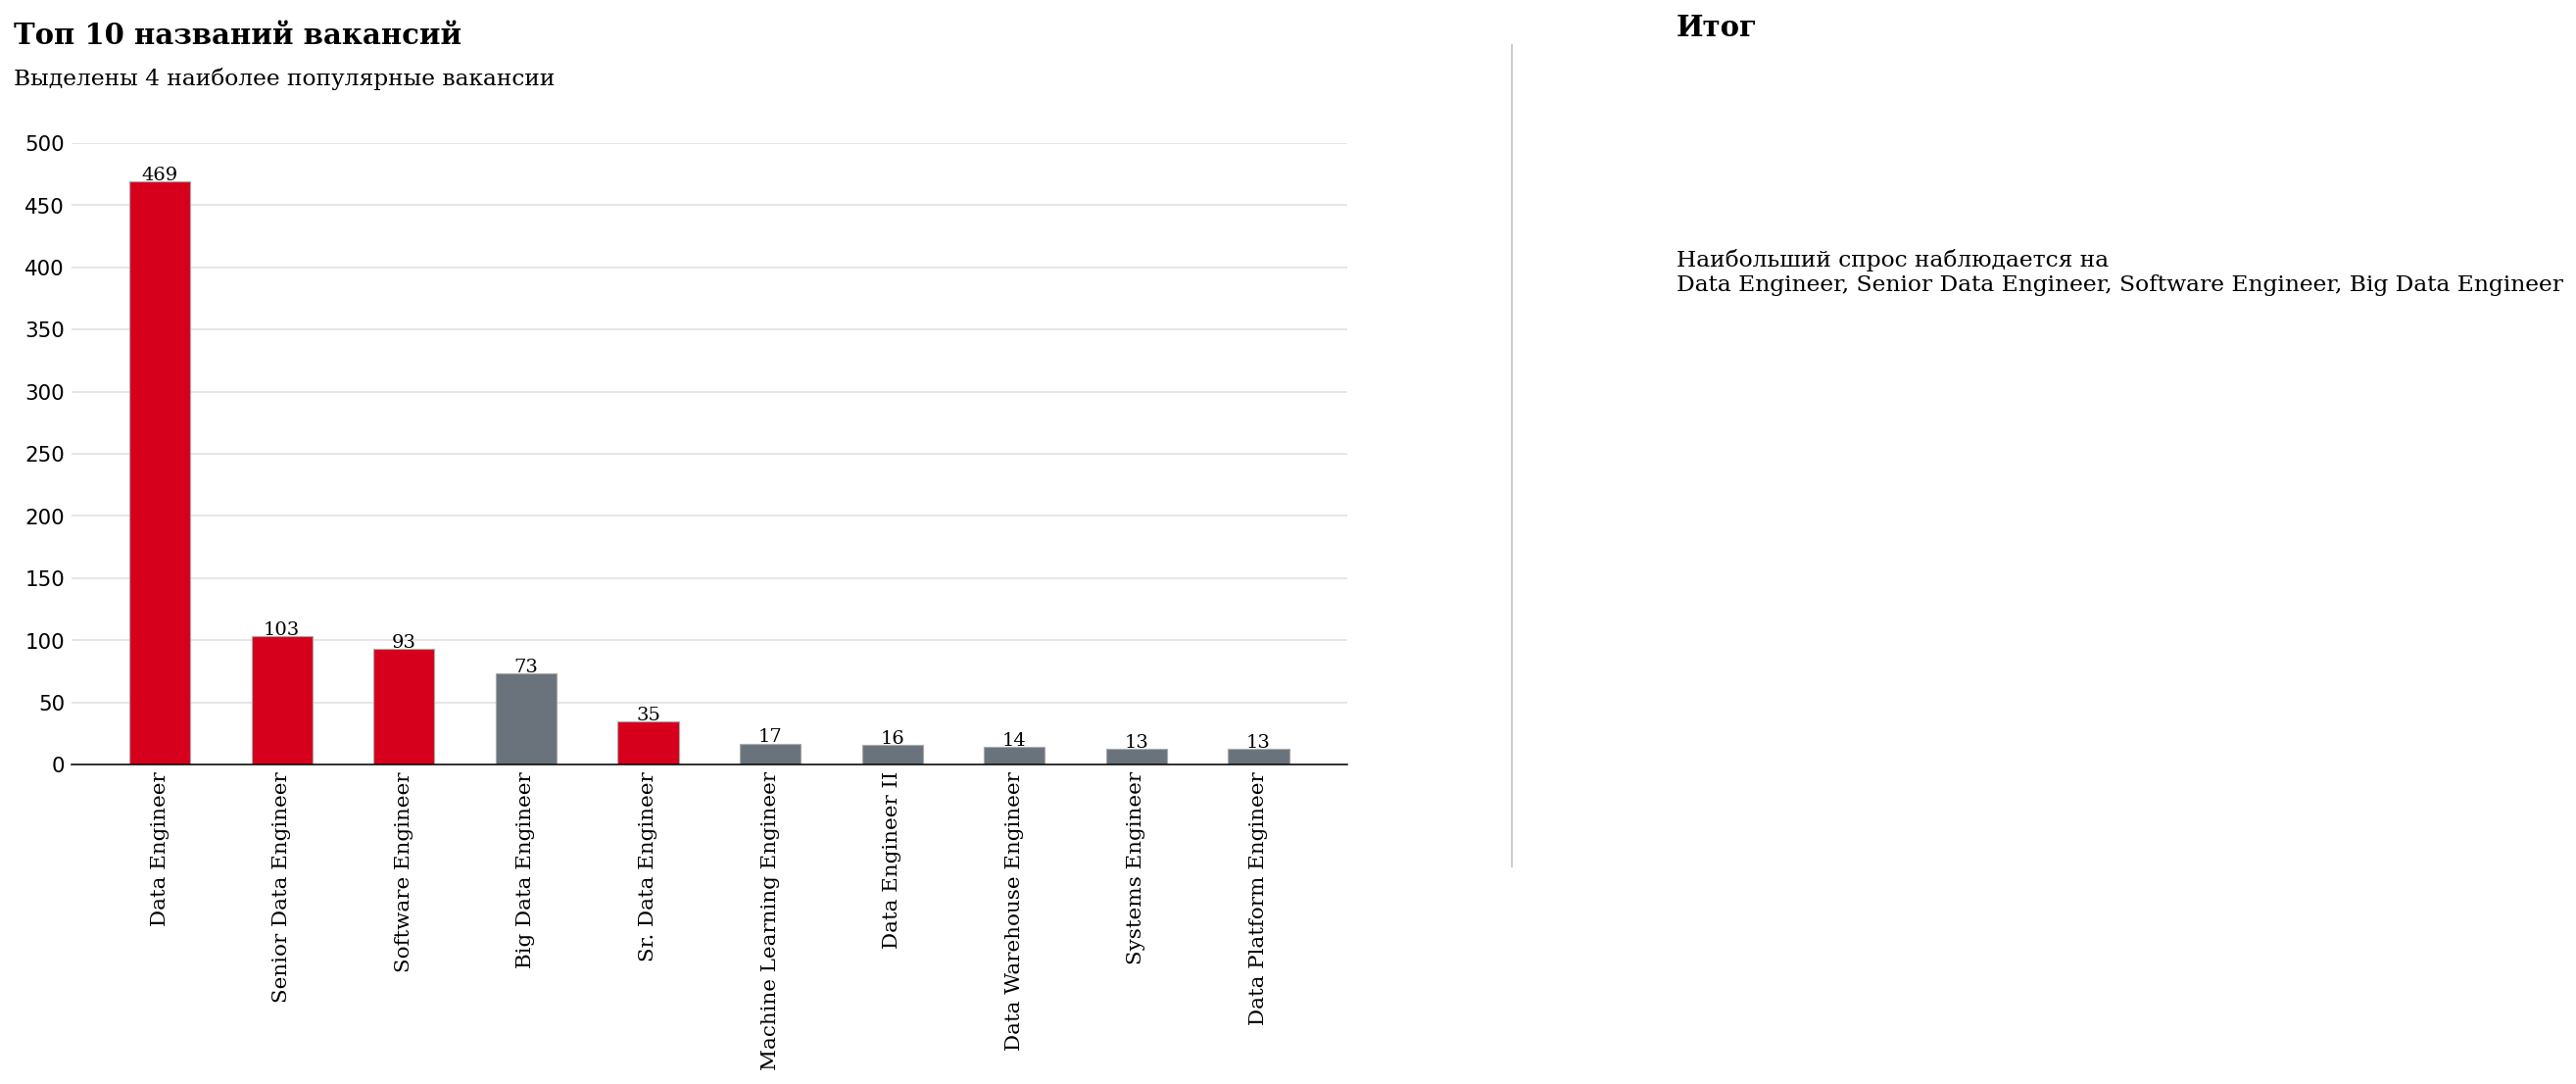

In [52]:
# Plot

color_map = ['#6a737b' for _ in range(10)]
color_map[0] = color_map[1] = color_map[2] = color_map[4] =  '#d6001c' # color highlight

fig, ax = plt.subplots(1,1, figsize=(12, 6))
ax.bar(data.index, data, width=0.5, 
       edgecolor='darkgray',
       linewidth=0.6,color=color_map)

#annotations
for i in data.index:
    ax.annotate(f"{data[i]}", 
                   xy=(i, data[i] + 5), #i like to change this to roughly 5% of the highest cat
                   va = 'center', ha='center',fontweight='light', fontfamily='serif')



# Remove border from plot

for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
# Tick labels

ax.set_xticklabels(data.index, fontfamily='serif', rotation=90)

# Title and sub-title

fig.text(0.09, 1, 'Топ 10 названий вакансий', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.09, 0.95, 'Выделены 4 наиболее популярные вакансии', fontsize=12, fontweight='light', fontfamily='serif')

fig.text(1.1, 1.01, 'Итог', fontsize=15, fontweight='bold', fontfamily='serif')


fig.text(1.1, 0.67, '''
Наибольший спрос наблюдается на
Data Engineer, Senior Data Engineer, Software Engineer, Big Data Engineer
'''
         , fontsize=12, fontweight='light', fontfamily='serif')

ax.grid(axis='y', linestyle='-', alpha=0.4)   

grid_y_ticks = np.arange(0, 550, 50) # y ticks, min, max, then step
ax.set_yticks(grid_y_ticks)
ax.set_axisbelow(True)

#Axis labels

#plt.xlabel("Country", fontsize=12, fontweight='light', fontfamily='serif',loc='left',y=-1.5)
#plt.ylabel("Count", fontsize=12, fontweight='light', fontfamily='serif')
#plt.legend(loc='upper right')
    
# thicken the bottom line if you want to
#plt.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

ax.tick_params(axis='both', which='major', labelsize=11)


import matplotlib.lines as lines
l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])

ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

## Построить график самых популярных местоположений вакансий по их численности и построить круговую диаграмму

In [94]:
data=df.groupby(['Location'])['Job Title'].count().sort_values(ascending=False)[:20]
data_sub2 = pd.DataFrame(data)
data_sub2.columns=['Value']
data_sub2=data_sub2.reset_index()
data_sub2.head(20)

,Location,Value
0,"Austin, TX",199
1,"Houston, TX",199
2,"San Diego, CA",195
3,"Chicago, IL",192
4,"San Antonio, TX",190
5,"New York, NY",187
6,"Philadelphia, PA",135
7,"Jacksonville, FL",122
8,"Phoenix, AZ",117
9,"Los Angeles, CA",106


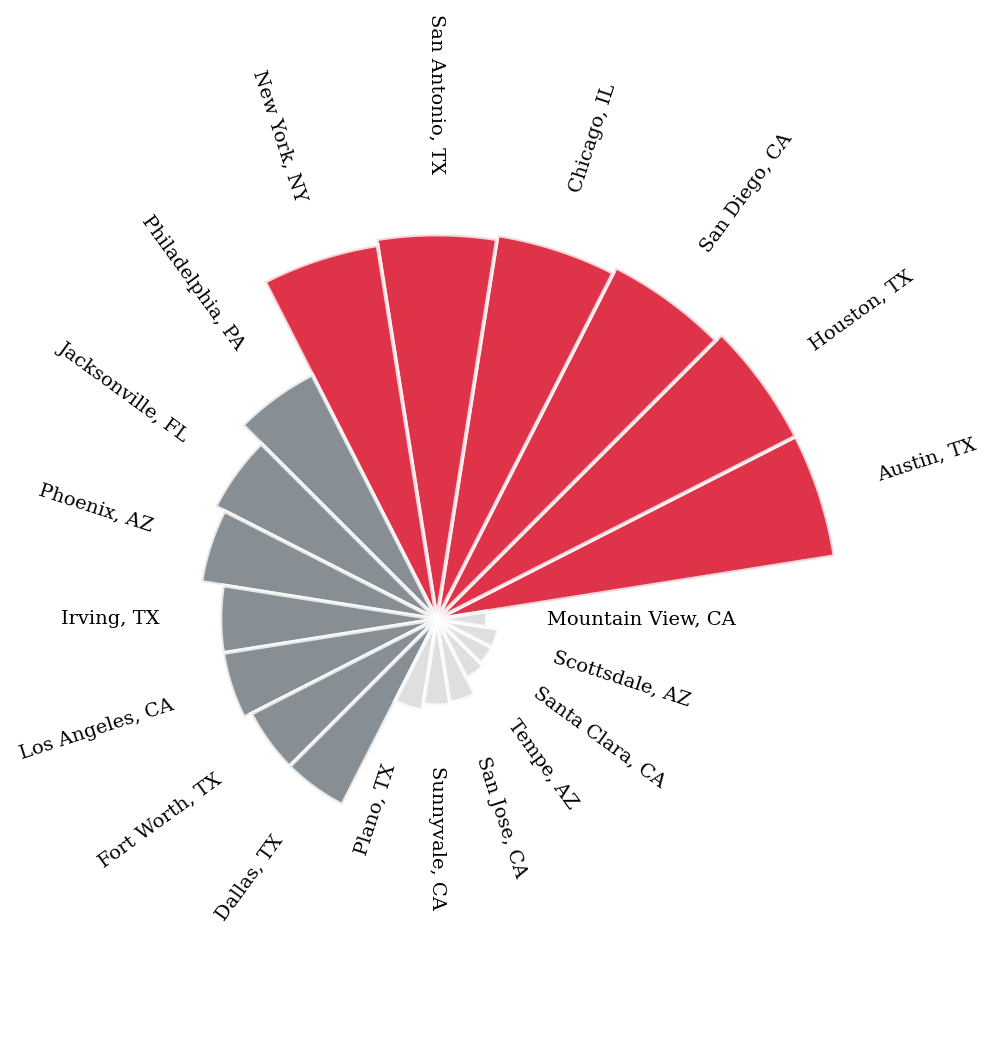

In [98]:
df_polar = data_sub2.sort_values(by='Value',ascending=False)

color_map = ['#6a737b' for _ in range(20)]
color_map[0] = color_map[1] = color_map[2] = color_map[3] = '#d6001c'
color_map[4] = color_map[5] = '#d6001c' # color highlight

for i in range(13,20):
  color_map[i] = '#d7d7d7' # color highlight

# initialize the figure
plt.figure(figsize=(8,8))
ax = plt.subplot(111, polar=True)
plt.axis('off')

# Constants = parameters controling the plot layout:
upperLimit = 30
lowerLimit = 1
labelPadding = 30

# Compute max and min in the dataset
max = df_polar['Value'].max()

# Let's compute heights: they are a conversion of each item value in those new coordinates
# In our example, 0 in the dataset will be converted to the lowerLimit (10)
# The maximum will be converted to the upperLimit (100)
slope = (max - lowerLimit) / max
heights = slope * df_polar.Value + lowerLimit

# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(df_polar.index)

# Compute the angle each bar is centered on:
indexes = list(range(1, len(df_polar.index)+1))
angles = [element * width for element in indexes]
angles

# Draw bars
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2, 
    edgecolor="white",
    color=color_map,alpha=0.8
)

# Add labels
for bar, angle, height, label in zip(bars,angles, heights, df_polar["Location"]):

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)

    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    # Finally add the labels
    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=label, 
        ha=alignment, fontsize=10,fontfamily='serif',
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor") 

## Построить график популярности по колонке Type of ownership, относительно численности вакансий

In [100]:
data=df.groupby(['Type of ownership'])['Job Title'].count().sort_values(ascending=False)[:20]
data

Type of ownership
Company - Private                 1392
Company - Public                   754
Subsidiary or Business Segment     126
-1                                 119
Nonprofit Organization              48
Unknown                             30
Government                          21
College / University                13
Contract                            10
Private Practice / Firm              6
Other Organization                   4
Hospital                             3
School / School District             1
Self-employed                        1
Name: Job Title, dtype: int64

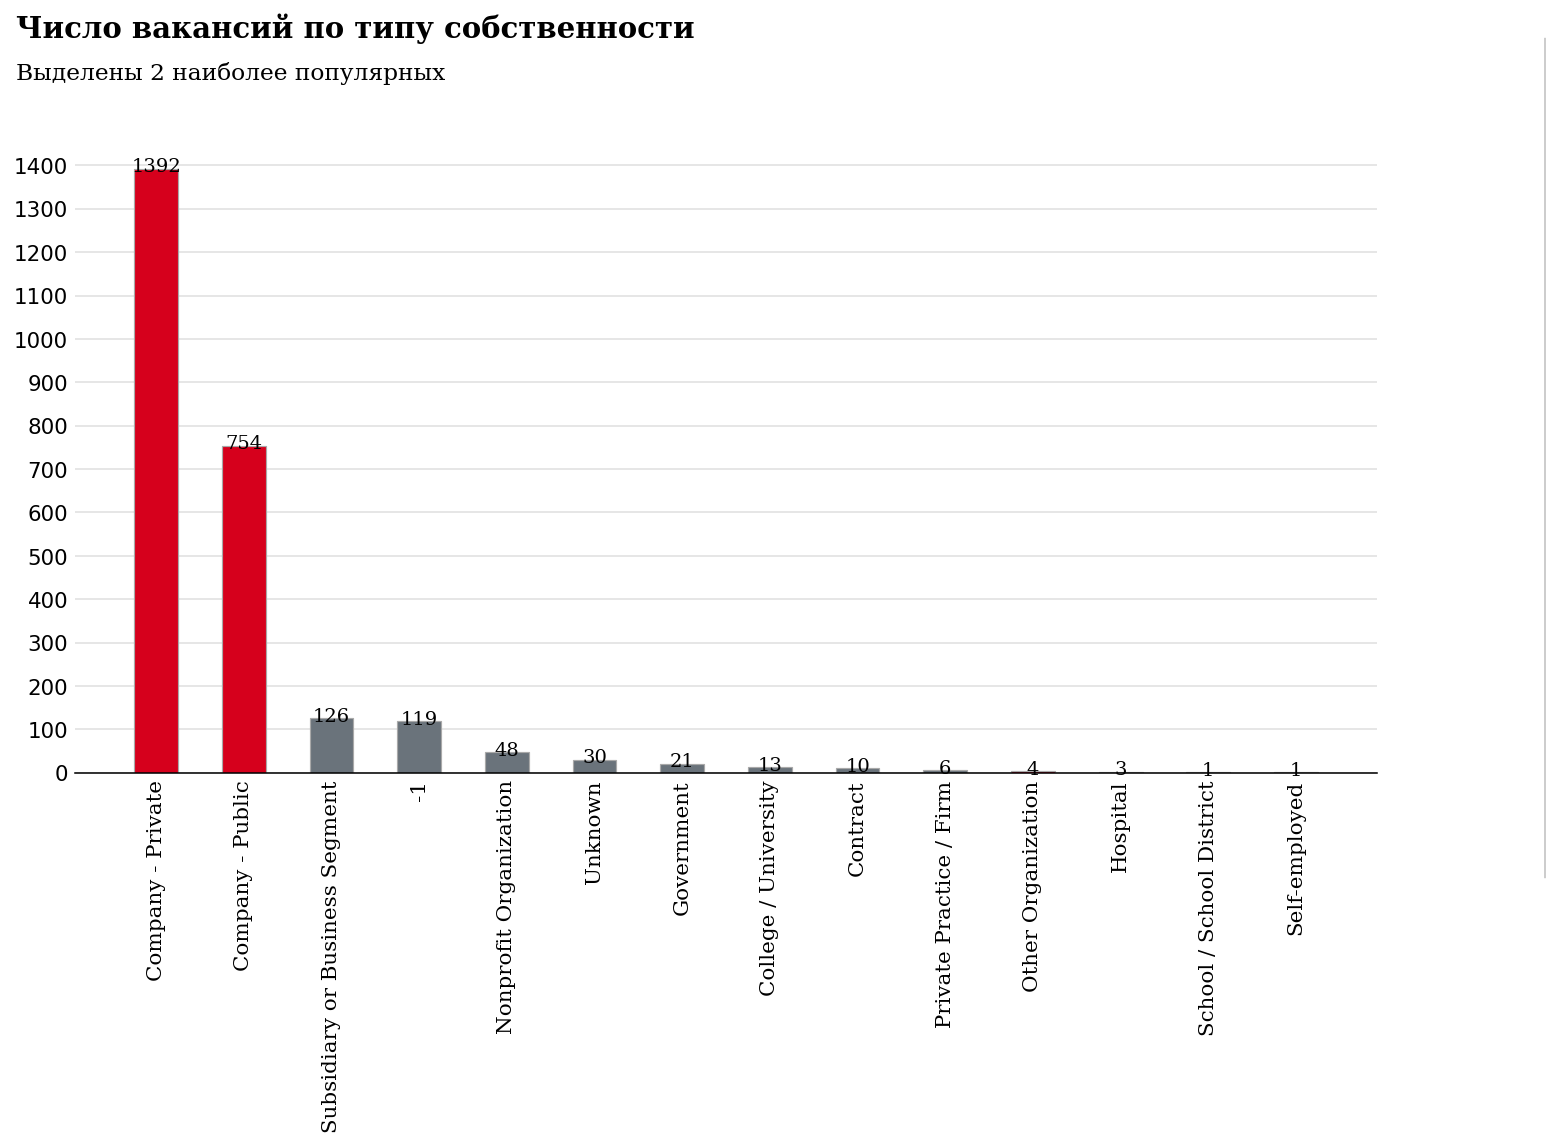

In [104]:
# Plot

color_map = ['#6a737b' for _ in range(10)]
color_map[0] = color_map[1] =  '#d6001c' # color highlight

fig, ax = plt.subplots(1,1, figsize=(12, 6))
ax.bar(data.index, data, width=0.5, 
       edgecolor='darkgray',
       linewidth=0.6,color=color_map)

#annotations
for i in data.index:
    ax.annotate(f"{data[i]}", 
                   xy=(i, data[i] + 5), #i like to change this to roughly 5% of the highest cat
                   va = 'center', ha='center',fontweight='light', fontfamily='serif')



# Remove border from plot

for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
# Tick labels

ax.set_xticklabels(data.index, fontfamily='serif', rotation=90)

# Title and sub-title

fig.text(0.09, 1, 'Число вакансий по типу собственности', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.09, 0.95, 'Выделены 2 наиболее популярных', fontsize=12, fontweight='light', fontfamily='serif')

ax.grid(axis='y', linestyle='-', alpha=0.4)   

grid_y_ticks = np.arange(0, 1500, 100) # y ticks, min, max, then step
ax.set_yticks(grid_y_ticks)
ax.set_axisbelow(True)

#Axis labels

#plt.xlabel("Country", fontsize=12, fontweight='light', fontfamily='serif',loc='left',y=-1.5)
#plt.ylabel("Count", fontsize=12, fontweight='light', fontfamily='serif')
#plt.legend(loc='upper right')
    
# thicken the bottom line if you want to
#plt.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

ax.tick_params(axis='both', which='major', labelsize=11)


import matplotlib.lines as lines
l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])

ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

## Построить график популярности по секторам работы

In [121]:
data=df.groupby(['Sector'])['Job Title'].count().sort_values(ascending=False)
data_sub2 = pd.DataFrame(data)
data_sub2.columns=['Value']
data_sub2=data_sub2.reset_index()
data_sub2.head(30)

,Sector,Value
0,Information Technology,890
1,Business Services,416
2,-1,375
3,Finance,177
4,Aerospace & Defense,94
5,Manufacturing,93
6,Insurance,82
7,Media,52
8,Health Care,51
9,"Oil, Gas, Energy & Utilities",37


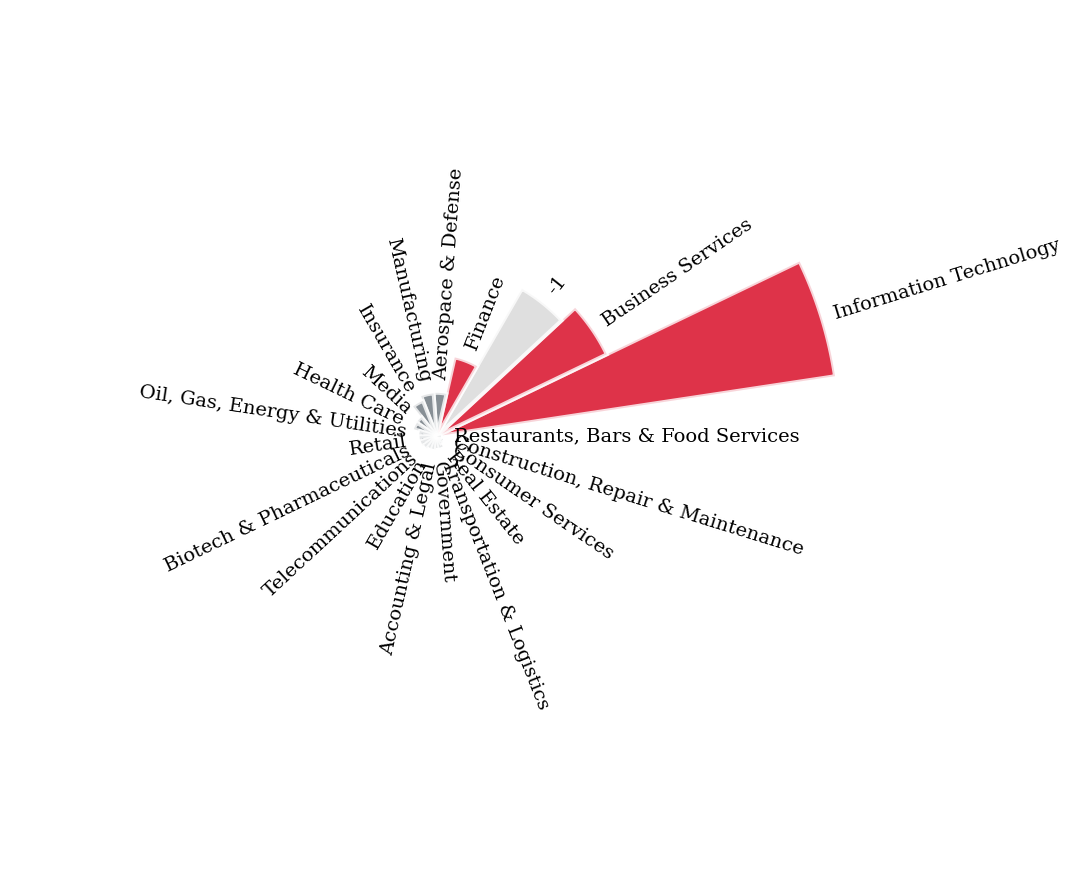

In [123]:
df_polar = data_sub2.sort_values(by='Value',ascending=False)[:21]

color_map = ['#6a737b' for _ in range(21)]
color_map[0] = color_map[1]  = color_map[3] = '#d6001c'
color_map[2] = '#d7d7d7'


# initialize the figure
plt.figure(figsize=(8,8))
ax = plt.subplot(111, polar=True)
plt.axis('off')

# Constants = parameters controling the plot layout:
upperLimit = 30
lowerLimit = 1
labelPadding = 30

# Compute max and min in the dataset
max = df_polar['Value'].max()

# Let's compute heights: they are a conversion of each item value in those new coordinates
# In our example, 0 in the dataset will be converted to the lowerLimit (10)
# The maximum will be converted to the upperLimit (100)
slope = (max - lowerLimit) / max
heights = slope * df_polar.Value + lowerLimit

# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(df_polar.index)

# Compute the angle each bar is centered on:
indexes = list(range(1, len(df_polar.index)+1))
angles = [element * width for element in indexes]
angles

# Draw bars
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2, 
    edgecolor="white",
    color=color_map,alpha=0.8
)

# Add labels
for bar, angle, height, label in zip(bars,angles, heights, df_polar["Sector"]):

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)

    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    # Finally add the labels
    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=label, 
        ha=alignment, fontsize=10,fontfamily='serif',
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor") 

## Построить график используя сектора работы и средний уровень зарплат в них

In [136]:
data=df.groupby(['Sector'])['Avg. Salary'].mean().sort_values(ascending=False)
data

Sector
Biotech & Pharmaceuticals             112.400000
Media                                 111.134615
Accounting & Legal                    106.333333
Health Care                           106.274510
Non-Profit                            106.000000
Information Technology                104.784270
Manufacturing                         103.752688
Education                             102.500000
Transportation & Logistics            100.833333
Restaurants, Bars & Food Services     100.428571
Telecommunications                     99.687500
Arts, Entertainment & Recreation       99.600000
-1                                     99.520000
Consumer Services                      99.307692
Finance                                97.887006
Business Services                      97.403846
Retail                                 96.805556
Insurance                              94.414634
Oil, Gas, Energy & Utilities           93.378378
Aerospace & Defense                    90.787234
Travel & Tour

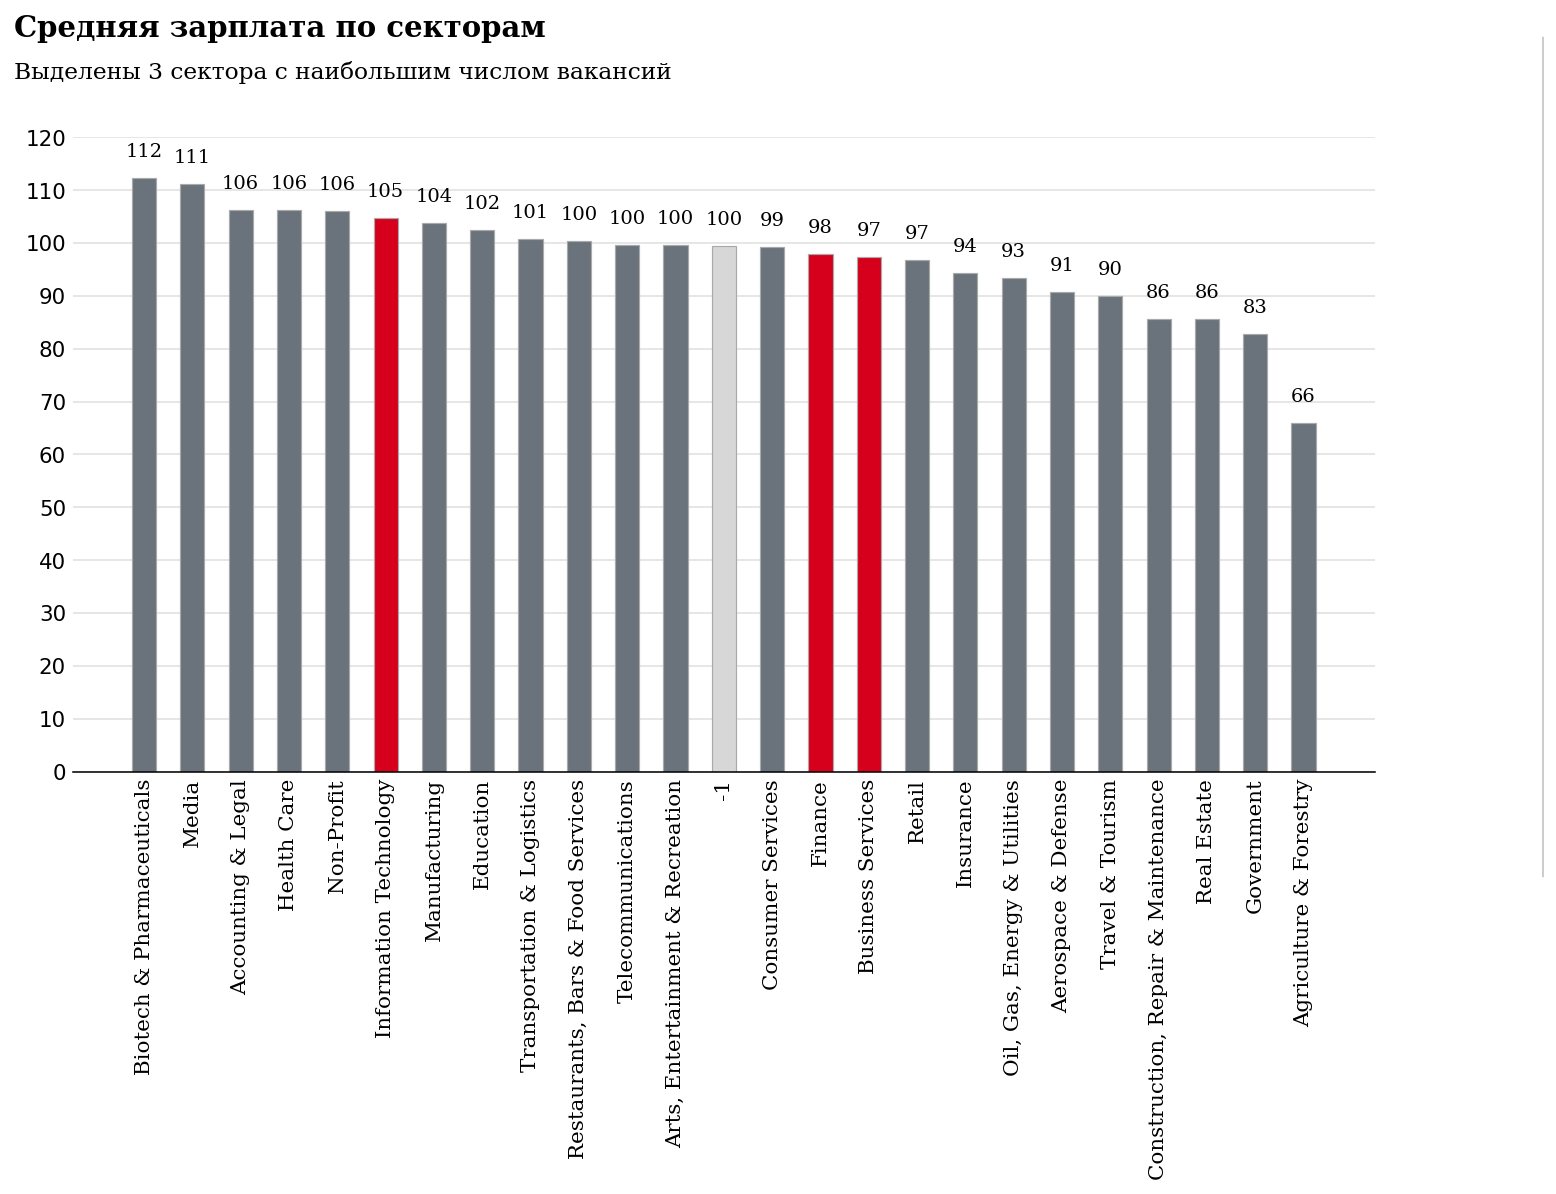

In [137]:
color_map = ['#6a737b' for _ in range(len(data))]
for i in range(len(data)):
  if data.index[i] in ['Finance','Business Services','Information Technology']:
    color_map[i] =  '#d6001c' # color highlight
  elif data.index[i] == '-1':
    color_map[i] =  '#d7d7d7' # color highlight

fig, ax = plt.subplots(1,1, figsize=(12, 6))
ax.bar(data.index, data, width=0.5, 
       edgecolor='darkgray',
       linewidth=0.6,color=color_map)

#annotations
for i in data.index:
    ax.annotate(f"{int(round(data[i],0))}", 
                   xy=(i, data[i] + 5), #i like to change this to roughly 5% of the highest cat
                   va = 'center', ha='center',fontweight='light', fontfamily='serif')



# Remove border from plot

for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
# Tick labels

ax.set_xticklabels(data.index, fontfamily='serif', rotation=90)

# Title and sub-title

fig.text(0.09, 1, 'Средняя зарплата по секторам', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.09, 0.95, 'Выделены 3 сектора с наибольшим числом вакансий', fontsize=12, fontweight='light', fontfamily='serif')

ax.grid(axis='y', linestyle='-', alpha=0.4)   

grid_y_ticks = np.arange(0, 130, 10) # y ticks, min, max, then step
ax.set_yticks(grid_y_ticks)
ax.set_axisbelow(True)

#Axis labels

#plt.xlabel("Country", fontsize=12, fontweight='light', fontfamily='serif',loc='left',y=-1.5)
#plt.ylabel("Count", fontsize=12, fontweight='light', fontfamily='serif')
#plt.legend(loc='upper right')
    
# thicken the bottom line if you want to
#plt.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

ax.tick_params(axis='both', which='major', labelsize=11)


import matplotlib.lines as lines
l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])

ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

## Построить гистограмму распределения рейтинга компаний

In [208]:
data=df.groupby(['Rating'])['Job Title'].count().sort_index(ascending=False)
data.name='Value'
data=data.reset_index()
#data

In [212]:
fin_dat = {'4.5+':0,'4.0-4.5':0,
            '3.5-4.0':0,'3.0-3.5':0,
            '2.5-3.0':0,'2.0-2.5':0,
            '1.5-2.0':0,'1.0-1.5':0,
            '0.5-1.0':0,'0.0-0.5':0,'НД':0}
for i in range(len(data.index)):
  if data.Rating[i] >=4.5 : fin_dat['4.5+']+=data.Value[i]
  elif data.Rating[i] >=4.0 : fin_dat['4.0-4.5']+=data.Value[i]
  elif data.Rating[i] >=3.5 : fin_dat['3.5-4.0']+=data.Value[i]
  elif data.Rating[i] >=3.0 : fin_dat['3.0-3.5']+=data.Value[i]
  elif data.Rating[i] >=2.5 : fin_dat['2.5-3.0']+=data.Value[i]
  elif data.Rating[i] >=2.0 : fin_dat['2.0-2.5']+=data.Value[i]
  elif data.Rating[i] >=1.5 : fin_dat['1.5-2.0']+=data.Value[i]
  elif data.Rating[i] >=1.0 : fin_dat['1.0-1.5']+=data.Value[i]
  elif data.Rating[i] >=0.5 : fin_dat['0.5-1.0']+=data.Value[i]
  elif data.Rating[i] >=0.0 : fin_dat['0.0-0.5']+=data.Value[i]
  else : fin_dat['НД']+=data.Value[i]

data=pd.Series(fin_dat.values(),name='Values',index=fin_dat.keys())
data

4.5+       372
4.0-4.5    499
3.5-4.0    889
3.0-3.5    397
2.5-3.0     96
2.0-2.5     16
1.5-2.0     20
1.0-1.5      5
0.5-1.0      0
0.0-0.5      0
НД         234
Name: Values, dtype: int64

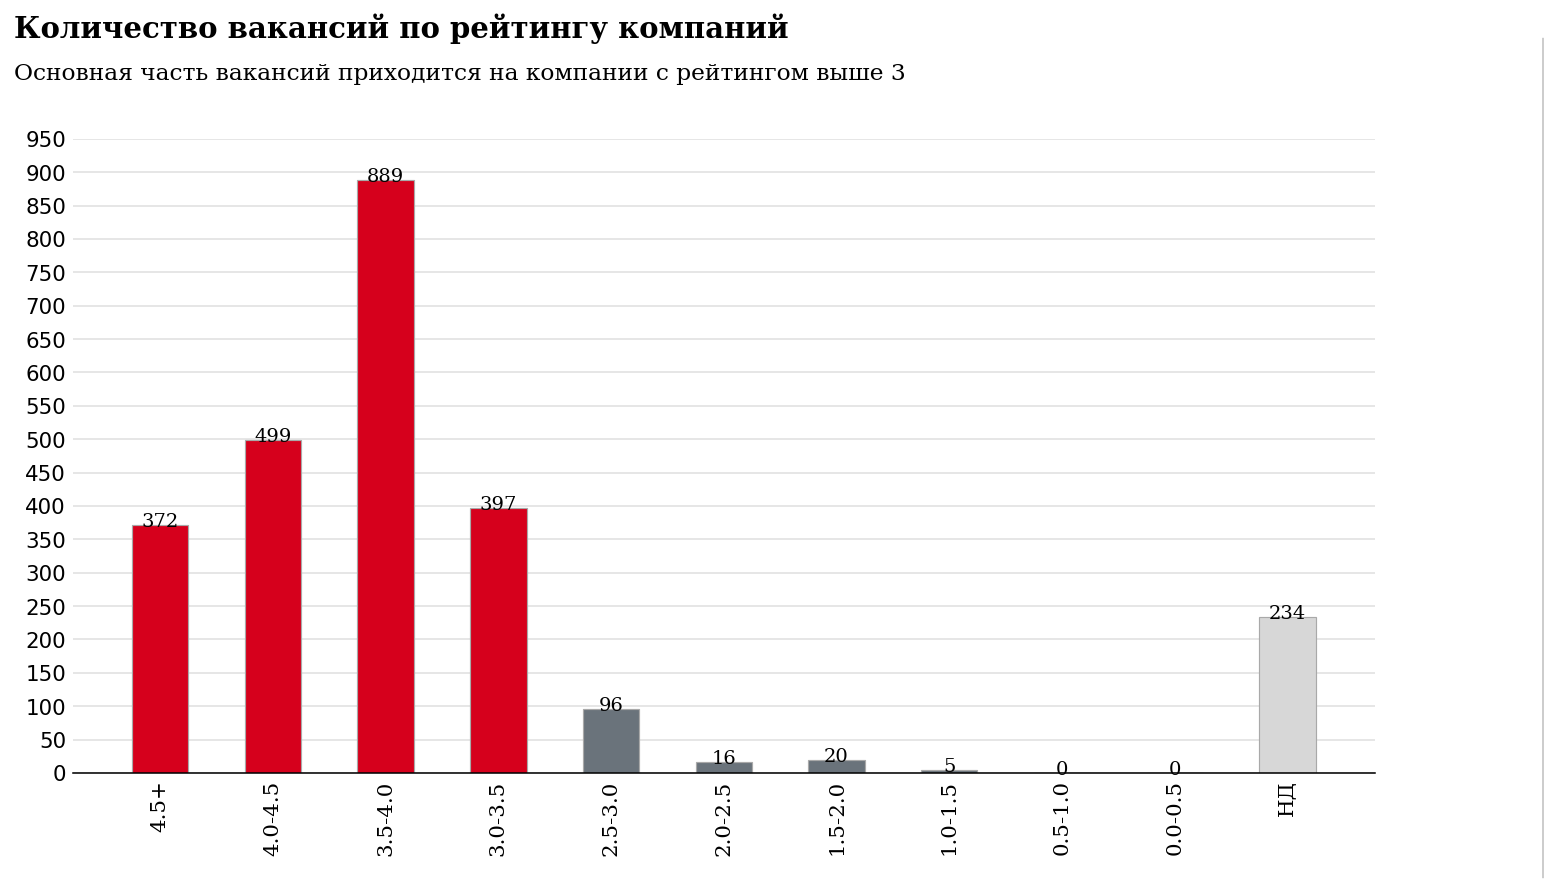

In [220]:
color_map = ['#6a737b' for _ in range(len(data))]

for i in range(len(data)):
  if data[i] >300: 
    color_map[i] =  '#d6001c' # color highlight
  elif data.index[i] == 'НД': 
    color_map[i] =  '#d7d7d7' # color highlight

fig, ax = plt.subplots(1,1, figsize=(12, 6))
ax.bar(data.index, data, width=0.5, 
       edgecolor='darkgray',
       linewidth=0.6,color=color_map)

#annotations
for i in data.index:
    ax.annotate(f"{data[i]}", 
                   xy=(i, data[i] + 5), #i like to change this to roughly 5% of the highest cat
                   va = 'center', ha='center',fontweight='light', fontfamily='serif')



# Remove border from plot

for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
# Tick labels

ax.set_xticklabels(data.index, fontfamily='serif', rotation=90)

# Title and sub-title

fig.text(0.09, 1, 'Количество вакансий по рейтингу компаний', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.09, 0.95, 'Основная часть вакансий приходится на компании с рейтингом выше 3', fontsize=12, fontweight='light', fontfamily='serif')

ax.grid(axis='y', linestyle='-', alpha=0.4)   

grid_y_ticks = np.arange(0, 970, 50) # y ticks, min, max, then step
ax.set_yticks(grid_y_ticks)
ax.set_axisbelow(True)

#Axis labels

#plt.xlabel("Country", fontsize=12, fontweight='light', fontfamily='serif',loc='left',y=-1.5)
#plt.ylabel("Count", fontsize=12, fontweight='light', fontfamily='serif')
#plt.legend(loc='upper right')
    
# thicken the bottom line if you want to
#plt.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

ax.tick_params(axis='both', which='major', labelsize=11)


import matplotlib.lines as lines
l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])

ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

## Построить график средних зарплат по популярным компаниям

In [233]:
pop_comp=set(df.groupby(['Company Name'])['Job Title'].count().sort_values(ascending=False)[:15].index)
df_pop_comp=df[df['Company Name'].isin(pop_comp)]
data=df_pop_comp.groupby(['Company Name'])['Avg. Salary'].mean().sort_values(ascending=False)
data

Company Name
Management Decisions, Inc.    124.785714
Apple                         124.777778
Capital One                   108.250000
Google                        106.071429
Amazon                        104.428571
MUFG                           99.538462
CyberCoders                    97.083333
The Home Depot                 96.833333
IntraEdge                      93.375000
Allstate                       91.181818
Lockheed Martin                90.500000
Diverse Lynx                   84.866667
Bell Helicopter                82.466667
Textron                        78.750000
Humana                         75.062500
Name: Avg. Salary, dtype: float64

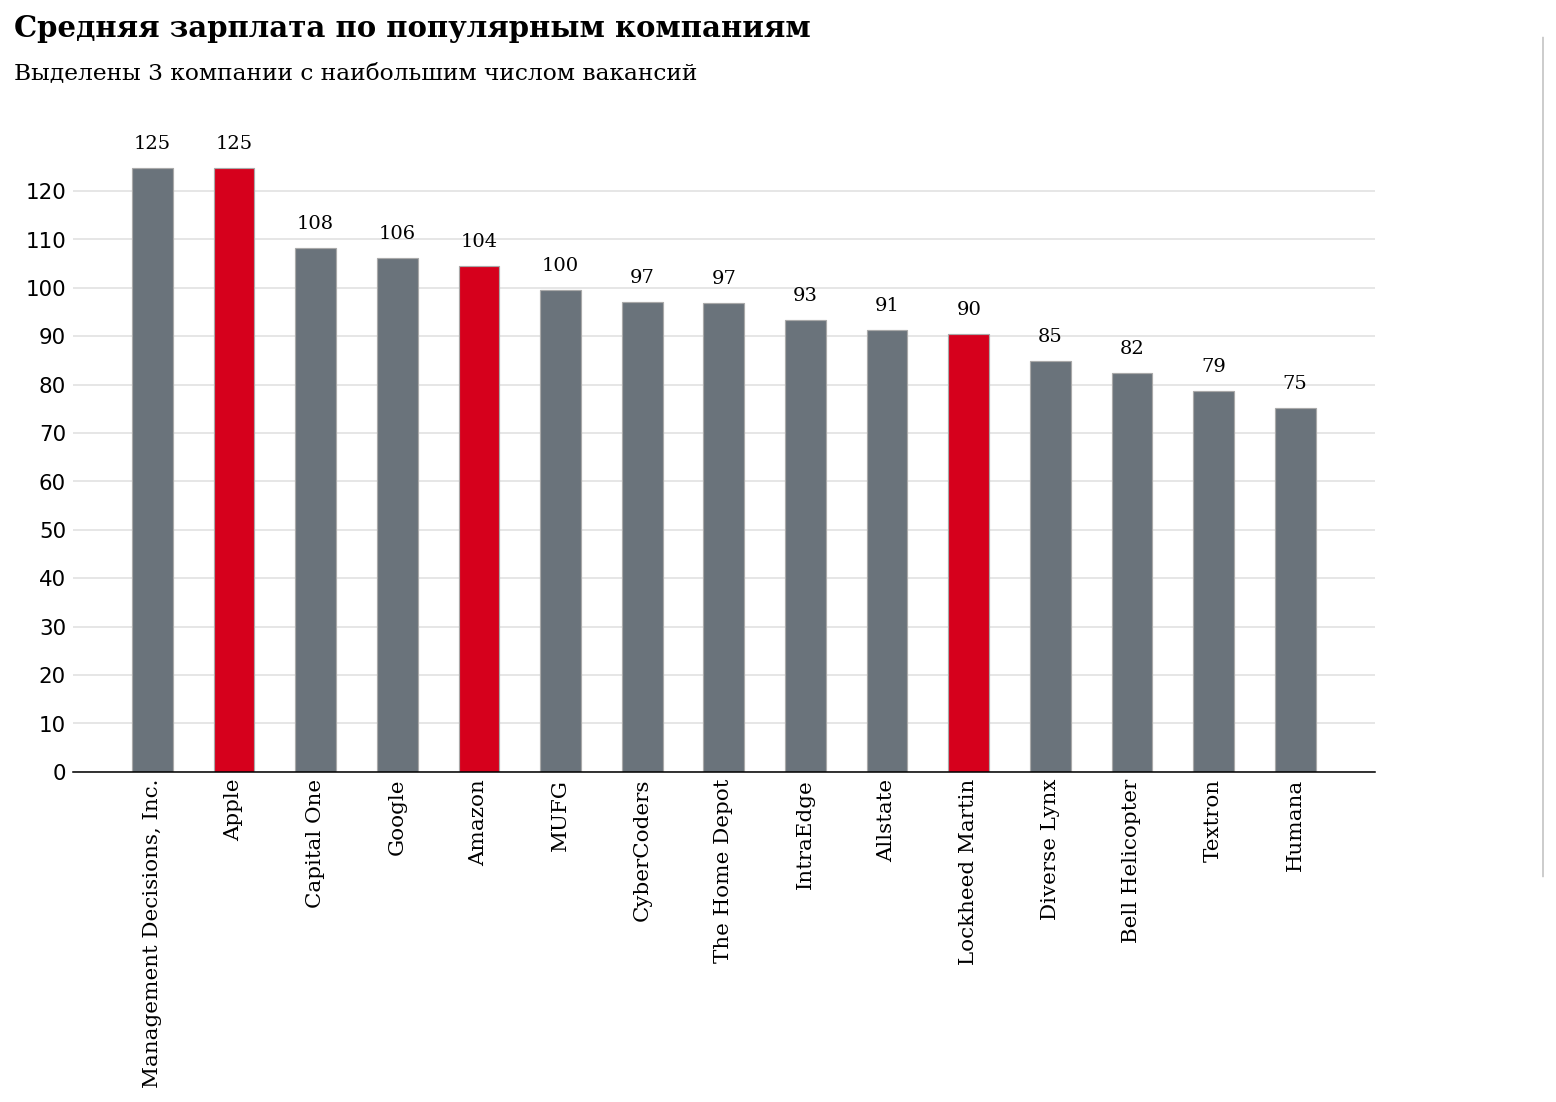

In [236]:
color_map = ['#6a737b' for _ in range(len(data))]
for i in range(len(data)):
  if data.index[i] in ['Amazon','Lockheed Martin', 'Apple']:
    color_map[i] =  '#d6001c' # color highlight

fig, ax = plt.subplots(1,1, figsize=(12, 6))
ax.bar(data.index, data, width=0.5, 
       edgecolor='darkgray',
       linewidth=0.6,color=color_map)

#annotations
for i in data.index:
    ax.annotate(f"{int(round(data[i],0))}", 
                   xy=(i, data[i] + 5), #i like to change this to roughly 5% of the highest cat
                   va = 'center', ha='center',fontweight='light', fontfamily='serif')



# Remove border from plot

for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
# Tick labels

ax.set_xticklabels(data.index, fontfamily='serif', rotation=90)

# Title and sub-title

fig.text(0.09, 1, 'Средняя зарплата по популярным компаниям', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.09, 0.95, 'Выделены 3 компании с наибольшим числом вакансий', fontsize=12, fontweight='light', fontfamily='serif')

ax.grid(axis='y', linestyle='-', alpha=0.4)   

grid_y_ticks = np.arange(0, 130, 10) # y ticks, min, max, then step
ax.set_yticks(grid_y_ticks)
ax.set_axisbelow(True)

#Axis labels

#plt.xlabel("Country", fontsize=12, fontweight='light', fontfamily='serif',loc='left',y=-1.5)
#plt.ylabel("Count", fontsize=12, fontweight='light', fontfamily='serif')
#plt.legend(loc='upper right')
    
# thicken the bottom line if you want to
#plt.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

ax.tick_params(axis='both', which='major', labelsize=11)


import matplotlib.lines as lines
l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])

ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

## Построить из описаний вакансий облако тегов, исследовать самые популярные слова

In [237]:
from wordcloud import WordCloud
import random
from PIL import Image
import matplotlib

# Custom colour map based on Netflix palette
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#221f1f', '#b20710'])

In [246]:
text = str(list(df['Job Description'])).replace(r'[^a-zA-Z0-9 ]', '')

wordcloud = WordCloud(background_color = 'white', width = 500,  height = 200,colormap=cmap, max_words = 200).generate(text)



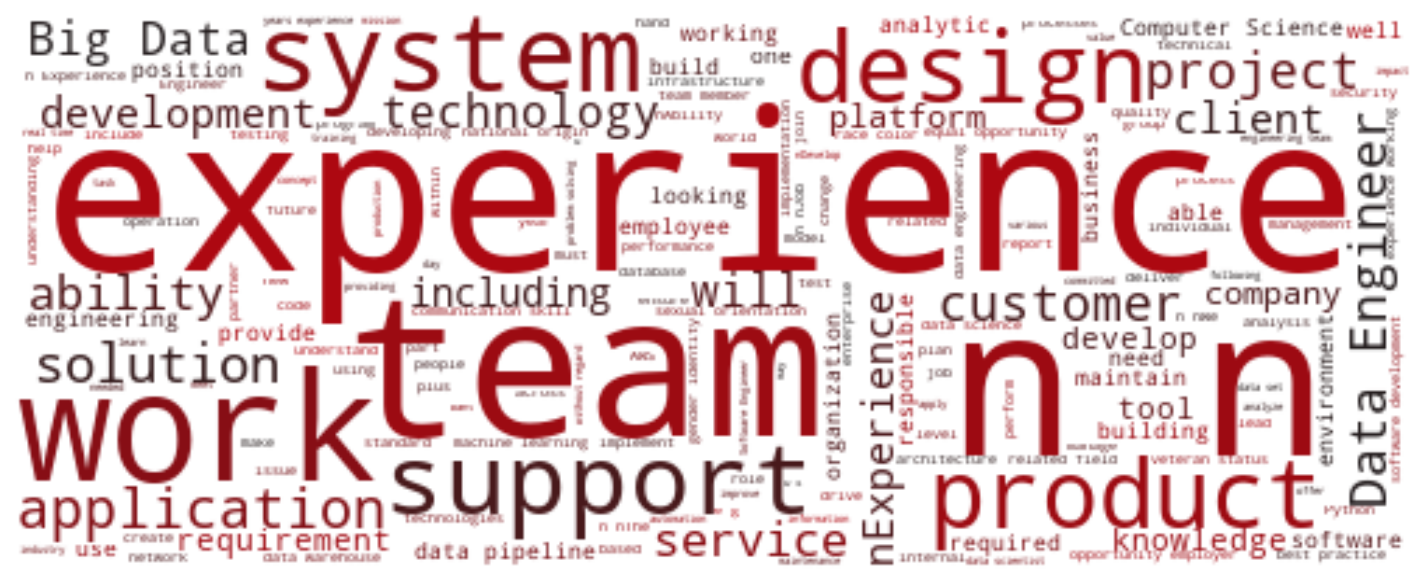

In [247]:
plt.figure( figsize=(10,10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

### Анализ облака слов
К наиболее значимым специфичным словам относятся NN - neural networks, Big Data. Больше всего нужен опыт.